# МЕТОДЫ КЛАСТЕРИЗАЦИИ

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Равномерное распределение
feature1 = np.random.uniform(0, 100, 1000)

# Нормальное распределение
feature2 = np.random.normal(50, 15, 1000)

# Биномиальное распределение
feature3 = np.random.binomial(n=100, p=0.5, size=1000)

# Экспоненциальное распределение
feature4 = np.random.exponential(scale=1.0, size=1000)

# Распределение Пуассона
feature5 = np.random.poisson(lam=5, size=1000)


data = pd.DataFrame({
    'Uniform': feature1,
    'Normal': feature2,
    'Binomial': feature3,
    'Exponential': feature4,
    'Poisson': feature5
})

# МЕТОД К-СРЕДНИХ

/Users/kolontajolga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


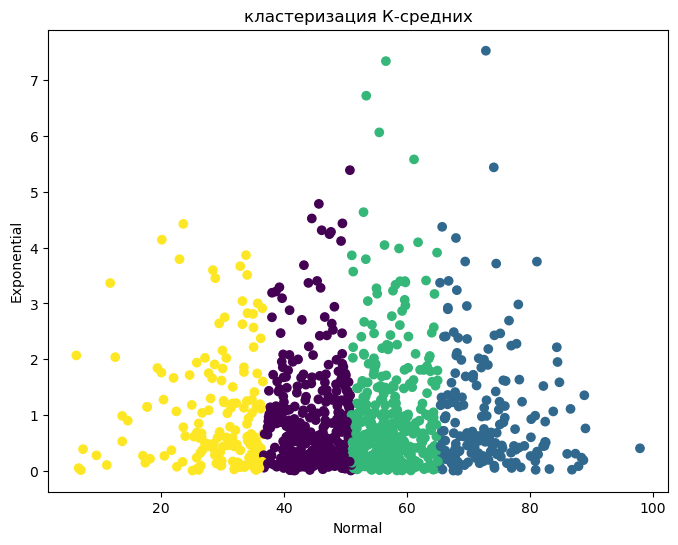

In [7]:
from sklearn.cluster import KMeans


X = data[['Normal', 'Exponential']]

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Предсказание кластеров
labels = kmeans.predict(X)

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X['Normal'], X['Exponential'], c=labels, cmap='viridis')
plt.xlabel('Normal')
plt.ylabel('Exponential')
plt.title('кластеризация К-средних')
plt.show()

# ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ

/Users/kolontajolga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


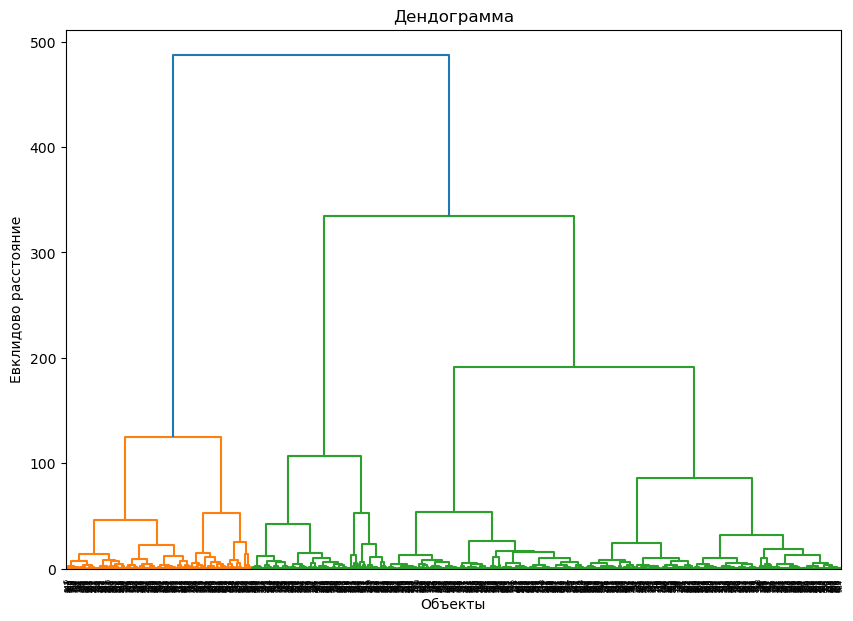

In [10]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Выборка двух признаков для визуализации
X = data[['Normal', 'Exponential']]

# Применение иерархической кластеризации
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Визуализация дендрограммы
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Дендограмма')
plt.xlabel('Объекты')
plt.ylabel('Евклидово расстояние')
plt.show()

# DBSCAN

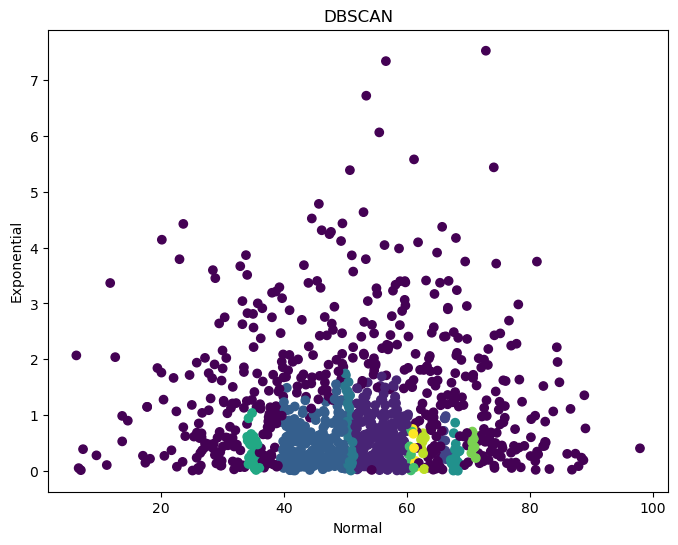

In [16]:
from sklearn.cluster import DBSCAN

# Выборка двух признаков для визуализации
X = data[['Normal', 'Exponential']]

# min_samples минимальное количество точек, требуемое для формирования плотностного кластера
# eps радиус, чтобы считать соседями

dbscan = DBSCAN(eps=0.5, min_samples=10)
y_db = dbscan.fit_predict(X)

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X['Normal'], X['Exponential'], c=y_db, cmap='viridis')
plt.xlabel('Normal')
plt.ylabel('Exponential')
plt.title('DBSCAN')
plt.show()

# Mean Shift

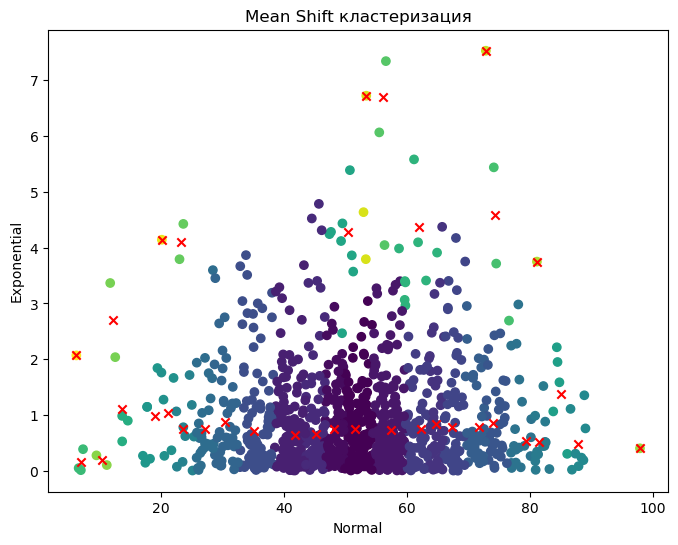

In [28]:
from sklearn.cluster import MeanShift


X = data[['Normal', 'Exponential']]
 
ms = MeanShift(bandwidth=2)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X['Normal'], X['Exponential'], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x') # Центры кластеров
plt.xlabel('Normal')
plt.ylabel('Exponential')
plt.title('Mean Shift кластеризация')
plt.show()

# CПЕКТРАЛЬНАЯ КЛАСТЕРИЗАЦИЯ

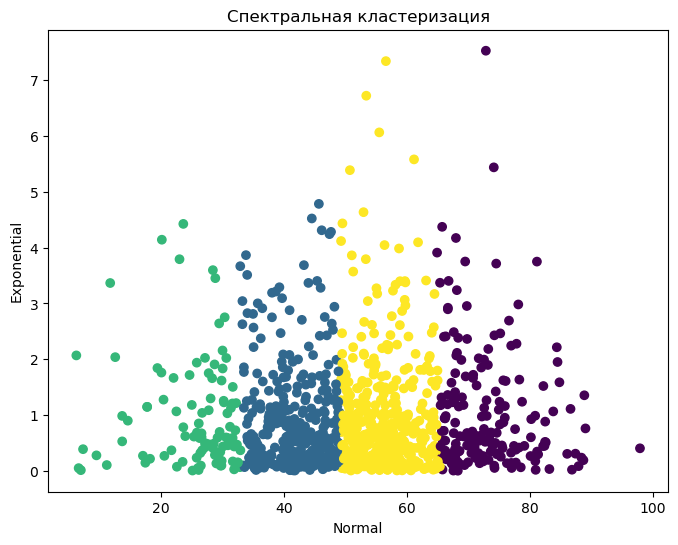

In [29]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt


X = data[['Normal', 'Exponential']]

# на основе матрицы смежности
sc = SpectralClustering(n_clusters=4, affinity='nearest_neighbors')
labels = sc.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X['Normal'], X['Exponential'], c=labels, cmap='viridis')
plt.xlabel('Normal')
plt.ylabel('Exponential')
plt.title('Спектральная кластеризация')
plt.show()

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering

def clustering(data,feat_1, feat_2,n_clusters=4):
    
    
    # K-средние
    #-----------------------------------------------------------------------------------------------------
    X = data[[feat_1, feat_2]]
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    # Визуализация KMeans
    plt.figure(figsize=(10, 7))
    plt.scatter(X[feat_1], X[feat_2], c=labels, cmap='viridis')
    plt.xlabel(feat_1)
    plt.ylabel(feat_2)
    plt.title('кластеризация К-средних')
    plt.show()
    
    
    # Дендограмма
    #-----------------------------------------------------------------------------------------------------
    hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    y_hc = hc.fit_predict(X)
    # Визуализация дендрограммы
    plt.figure(figsize=(10, 7))
    dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
    plt.title('Дендограмма')
    plt.xlabel('Объекты')
    plt.ylabel('Евклидово расстояние')
    plt.show()
    
    
    # DBSCAN
    #-----------------------------------------------------------------------------------------------------
    dbscan = DBSCAN(eps=0.5, min_samples=10)
    y_db = dbscan.fit_predict(X)
    # Визуализация кластеров
    plt.figure(figsize=(10, 7))
    plt.scatter(X[feat_1], X[feat_2], c=y_db, cmap='viridis')
    plt.xlabel(feat_1)
    plt.ylabel(feat_2)
    plt.title('DBSCAN')
    plt.show()
    
    
    # MeanShift
    #-----------------------------------------------------------------------------------------------------
    ms = MeanShift(bandwidth=2)
    ms.fit(X)
    labels_ms = ms.labels_
    cluster_centers = ms.cluster_centers_
    # Визуализация кластеров
    plt.figure(figsize=(10, 7))
    plt.scatter(X[feat_1], X[feat_2], c=labels_ms, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x') # Центры кластеров
    plt.xlabel(feat_1)
    plt.ylabel(feat_2)
    plt.title('Mean Shift кластеризация')
    plt.show()
    
    
    # Spectral
    #-----------------------------------------------------------------------------------------------------
    # на основе матрицы смежности
    sc = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
    labels_sc = sc.fit_predict(X)
    # Визуализация кластеров
    plt.figure(figsize=(10, 7))
    plt.scatter(X[feat_1], X[feat_2], c=labels_sc, cmap='viridis')
    plt.xlabel(feat_1)
    plt.ylabel(feat_2)
    plt.title('Спектральная кластеризация')
    plt.show()

/Users/kolontajolga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


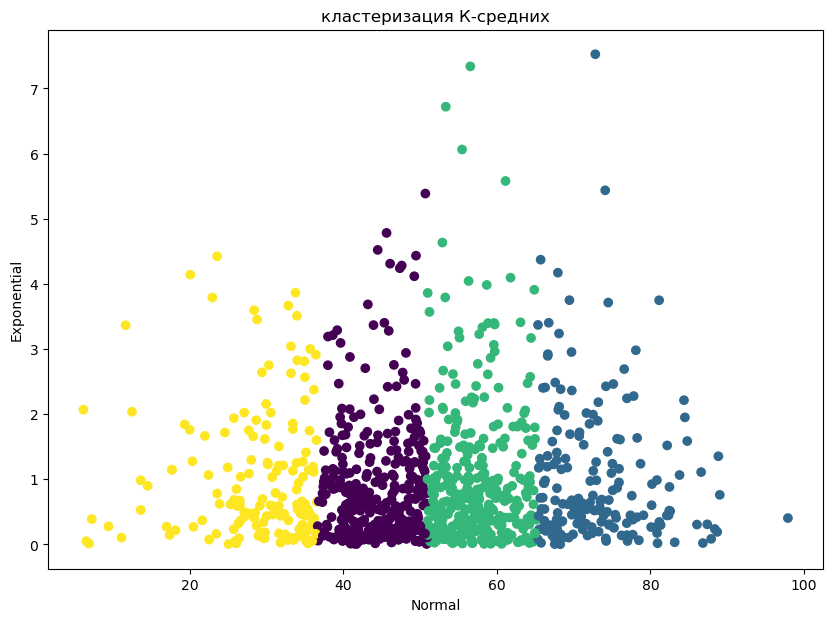

/Users/kolontajolga/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


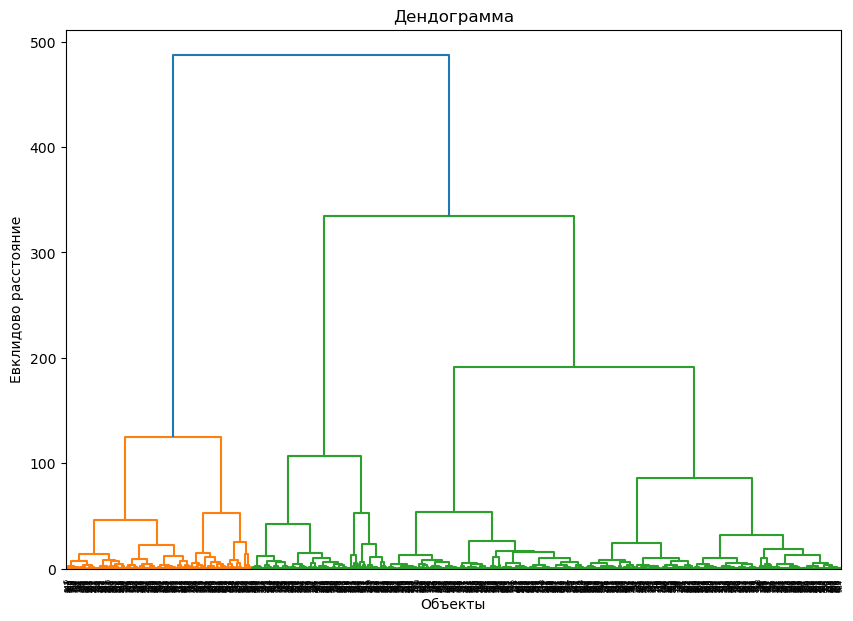

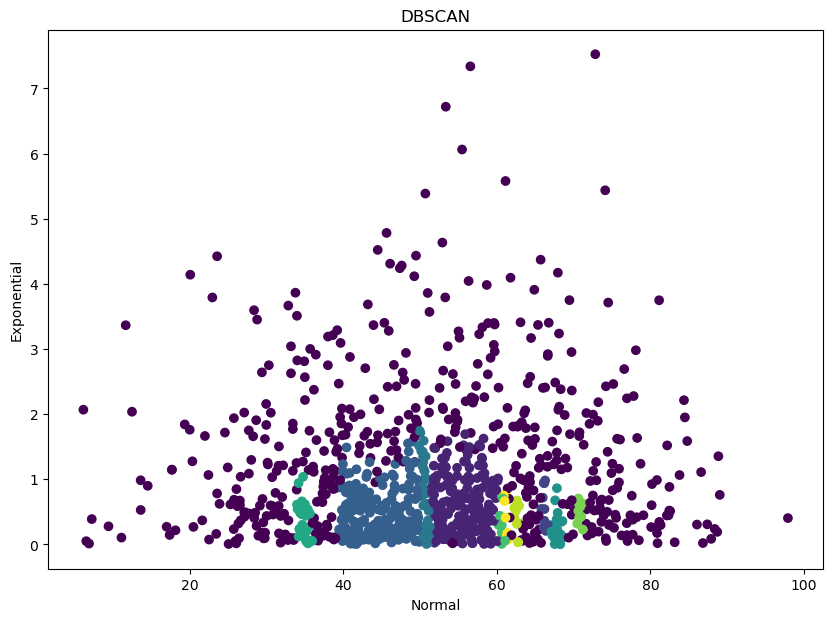

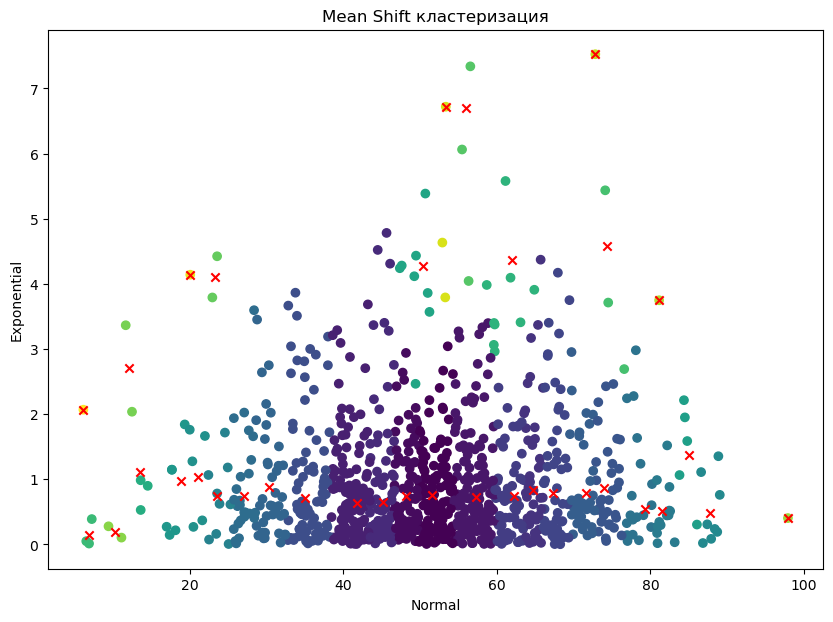

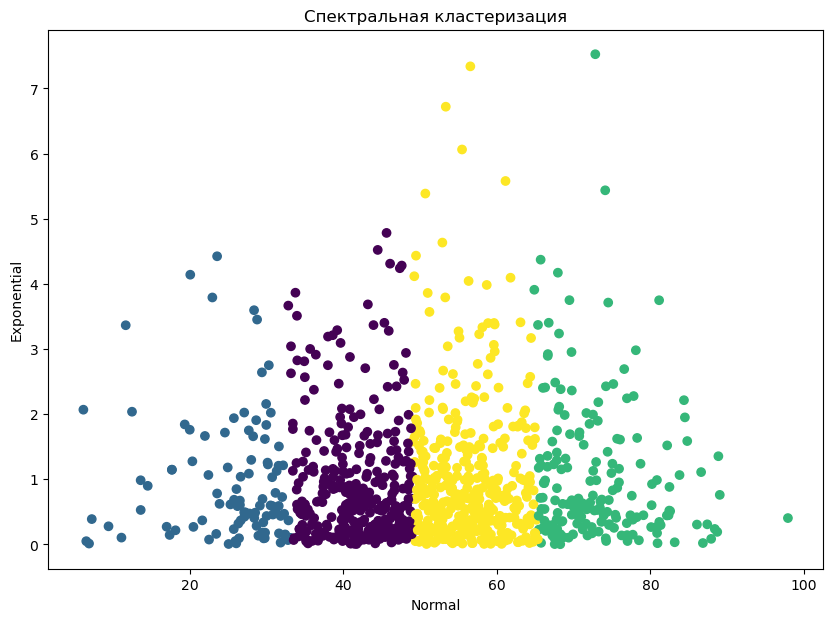

In [43]:
clustering(data,'Normal','Exponential')